In [19]:
#synthetic dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 7
X = 2 - 3 * np.random.normal(0, 1, 20)
Y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.exp(-X)+np.random.normal(-3, 3, 20)
X = X[:, np.newaxis]
Y = Y[:, np.newaxis]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,\
test_size=validation_size, random_state=seed)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
rmse_lin = np.sqrt(mean_squared_error(Y_train,Y_pred))
r2_lin = r2_score(Y_train,Y_pred)
print("RMSE for Linear Regression:", rmse_lin)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_poly, Y_train)
Y_poly_pred = model.predict(x_poly)
rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
r2 = r2_score(Y_train,Y_poly_pred)
print("RMSE for Polynomial Regression:", rmse)

RMSE for Linear Regression: 6.00805499029746
RMSE for Polynomial Regression: 5.729850825655176


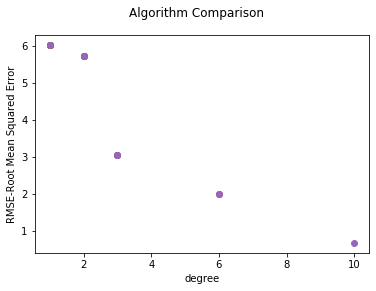

In [29]:
Deg= [1,2,3,6,10]
results=[]
names=[]
for deg in Deg:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
    r2 = r2_score(Y_train,Y_poly_pred)
    results.append(rmse)
    names.append(deg)
    plt.plot(names, results,'o')
    plt.suptitle('Algorithm Comparison')
    plt.xlabel('degree')
    plt.ylabel('RMSE-Root Mean Squared Error')

Text(0, 0.5, 'RMSE-Root Mean Squared Error')

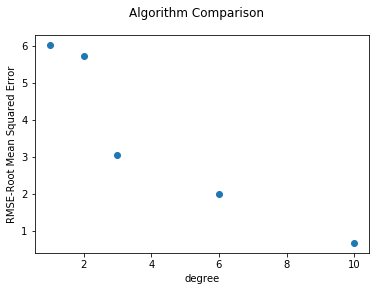

In [28]:
Deg= [1,2,3,6,10]
results=[]
names=[]
for deg in Deg:
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    Y_poly_pred = model.predict(x_poly)
    rmse = np.sqrt(mean_squared_error(Y_train,Y_poly_pred))
    r2 = r2_score(Y_train,Y_poly_pred)
    results.append(rmse)
    names.append(deg)
plt.plot(names, results,'o')
plt.suptitle('Algorithm Comparison')
plt.xlabel('degree')
plt.ylabel('RMSE-Root Mean Squared Error')

Text(0, 0.5, 'RMSE')

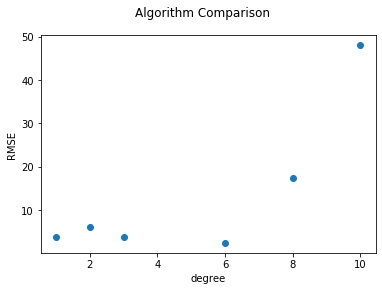

In [26]:
Deg= [1,2,3,6,8,10]
results_test=[]
names_test=[]

for deg in Deg:
    
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(x_poly, Y_train)
    x_poly_test = polynomial_features.fit_transform(X_test)
    Y_poly_pred_test = model.predict(x_poly_test)
    rmse = np.sqrt(mean_squared_error(Y_test,Y_poly_pred_test))
    r2 = r2_score(Y_test,Y_poly_pred_test)
    results_test.append(rmse)
    names_test.append(deg)
plt.plot(names_test, results_test,'o')
plt.suptitle('Algorithm Comparison')
plt.xlabel('degree')
plt.ylabel('RMSE')